In [47]:
library(readr)
library(ggplot2)
library(dplyr)
library(broom)

In [3]:
insurance <- read_csv("insurance.csv")

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_character(),
  bmi = col_double(),
  children = col_double(),
  smoker = col_character(),
  region = col_character(),
  charges = col_double()
)


In [7]:
summary(insurance)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

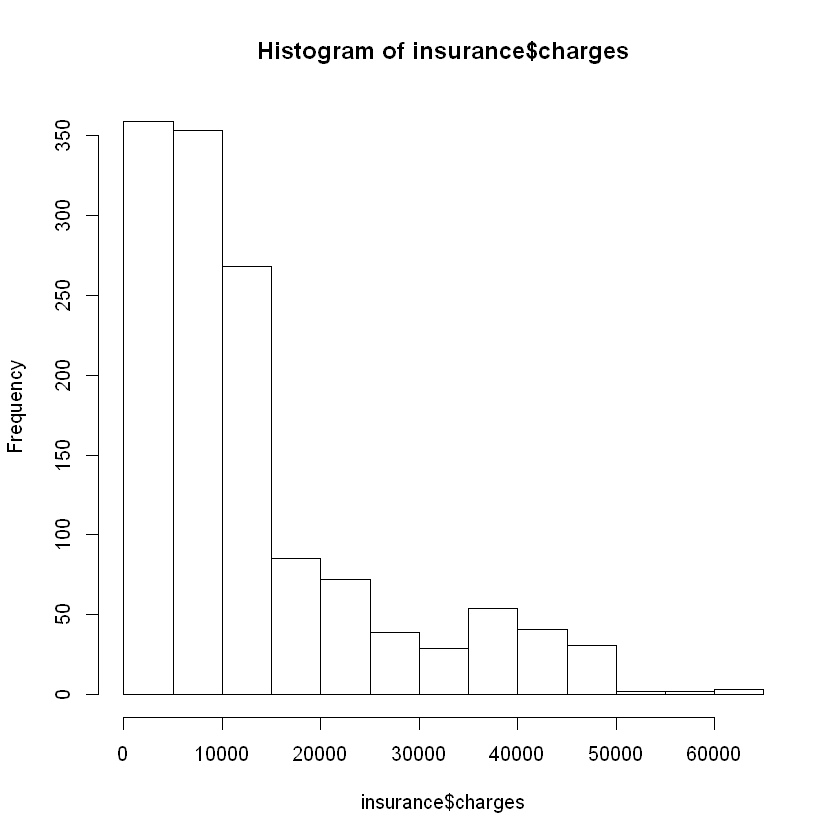

In [8]:
hist(insurance$charges)

Os valores dos premiuns estão distribuídos de forma assimétrica á direita indicando que há fatores na população que aumentam o valor do premium.

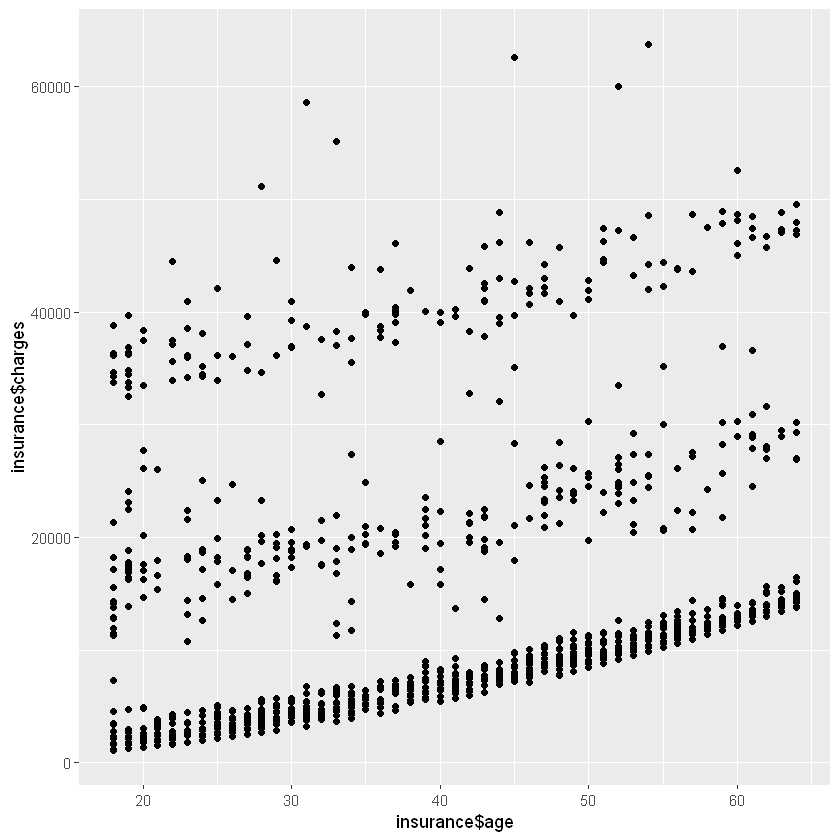

In [15]:
ggplot(insurance, aes(x = insurance$age, y = insurance$charges)) + 
  geom_point()

Vemos claramente que há uma correlação linear entre as variáveis idade e o valor do premium. Porém, essa relação além de apresentar alta variablidade possui perfis distintos dentro da própria amostra. O que nos leva a crer que talvez existam grupos distintos na amostra.

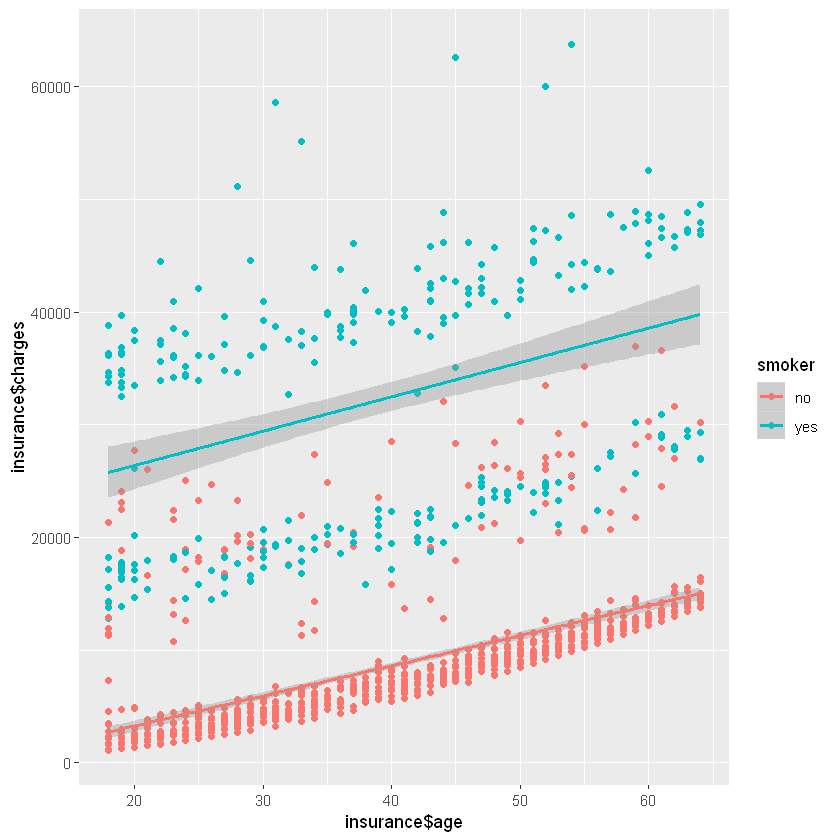

In [17]:
ggplot(insurance, aes(x = insurance$age, y = insurance$charges, colour = smoker)) + 
  geom_point() +
  geom_smooth(method = "lm", se = TRUE)

In [33]:
insurance %>%
    group_by(smoker) %>%
    summarize(
        meanCharges = mean(charges), 
        sdCharges = sd(charges),
        corrAgeCharges = cor(age, charges)
    )

smoker,meanCharges,sdCharges,corrAgeCharges
no,8434.268,5993.782,0.6279468
yes,32050.232,11541.547,0.3682244


Vemos que o fator `fumante` tem grande efeito de separação dentro das amostra. O que significa que vale a pena estudar a variabilidade dos grupo `fumante` uma vez que ele possui maior variabilidade.

Também, vimos que há uma correlação maior entre o a idade e os custos para os `não fumantes` do que para os `fumantes`. Assim, é esperado que haja mais fatores no grupo de `fumantes` que explicam os custos.

In [36]:
insurance <- insurance %>%
  mutate(
    overweight = bmi > 25 # => acima do peso (literatura)
  )

smokers <- insurance %>% filter(smoker == "yes")
nonsmokers <- insurance %>% filter(smoker == "no")

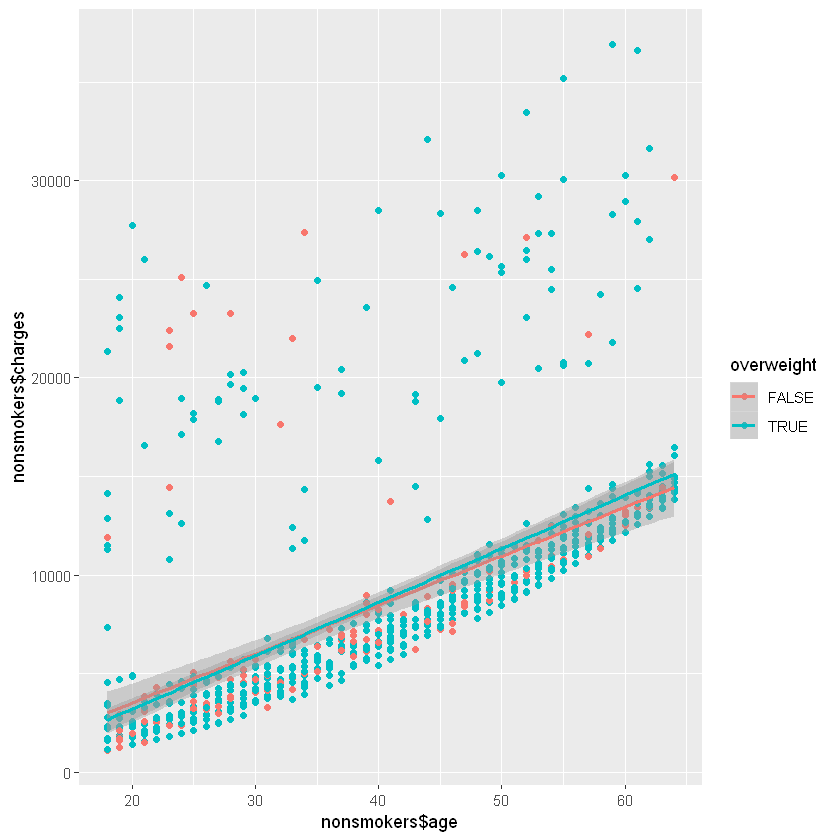

In [40]:
ggplot(nonsmokers, aes(x = nonsmokers$age, y = nonsmokers$charges, colour = overweight)) + 
  geom_point() +
  geom_smooth(method = "lm", se = TRUE)

In [41]:
nonsmokers %>%
    group_by(overweight) %>%
    summarize(
        meanCharges = mean(charges), 
        sdCharges = sd(charges),
        corrAgeCharges = cor(age, charges)
    )

overweight,meanCharges,sdCharges,corrAgeCharges
FALSE,7547.184,5708.019,0.6088388
TRUE,8629.590,6040.554,0.6292556


Pelo gráfico acima, vimos que o `sobrepeso` não parece ser um fator de separação entre os dados de foma significativa uma vez que a correlação entre os grupos é a mesma.

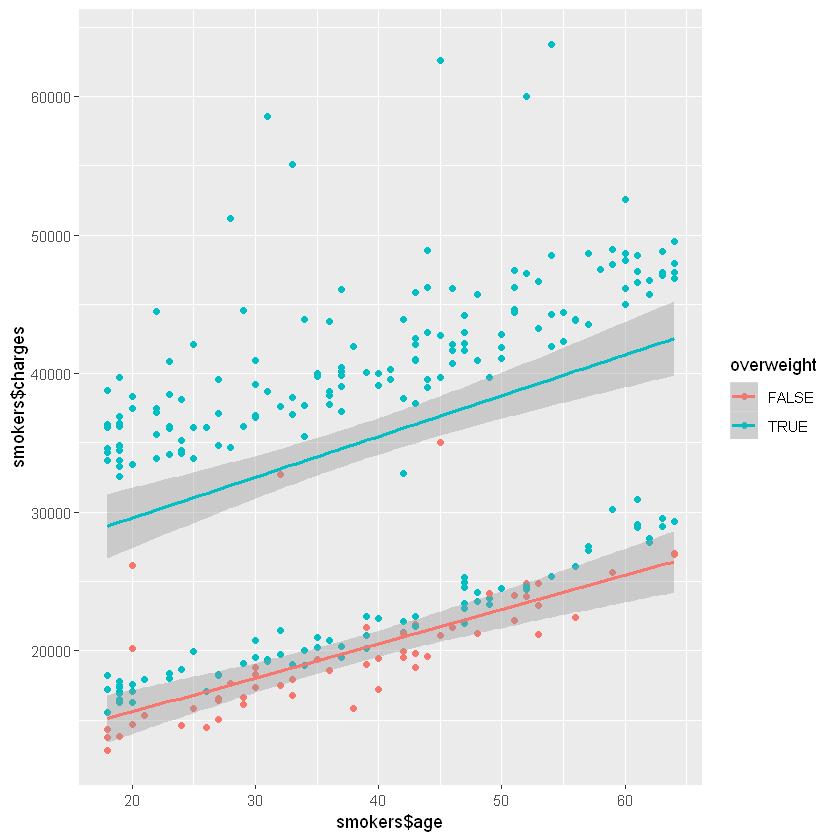

In [37]:
ggplot(smokers, aes(x = smokers$age, y = smokers$charges, colour = overweight)) + 
  geom_point() +
  geom_smooth(method = "lm", se = TRUE)

In [38]:
smokers %>%
    group_by(overweight) %>%
    summarize(
        meanCharges = mean(charges), 
        sdCharges = sd(charges),
        corrAgeCharges = cor(age, charges)
    )

overweight,meanCharges,sdCharges,corrAgeCharges
FALSE,19839.28,4583.245,0.6702694
TRUE,35116.91,10702.561,0.3924943


Assumindo que o `sobrepeso` é um fator discriminatório no grupo dos `fumantes`. Então, ao observamos que a correlação no grupo `fumantes sem sobrepeso` é maior.

In [57]:
mdl_charges <- lm(charges ~ age, data = insurance)
summary(mdl_charges)


Call:
lm(formula = charges ~ age, data = insurance)

Residuals:
   Min     1Q Median     3Q    Max 
 -8059  -6671  -5939   5440  47829 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3165.9      937.1   3.378 0.000751 ***
age            257.7       22.5  11.453  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11560 on 1336 degrees of freedom
Multiple R-squared:  0.08941,	Adjusted R-squared:  0.08872 
F-statistic: 131.2 on 1 and 1336 DF,  p-value: < 2.2e-16


In [49]:
glance(mdl_charges)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.0894059,0.08872432,11560.31,131.174,4.886693e-29,2,-14414.97,28835.95,28851.55,1.78544e+11,1336


In [56]:
mdl_charges_smoker <- lm(charges ~ age + smoker, data = insurance)
summary(mdl_charges_smoker)


Call:
lm(formula = charges ~ age + smoker, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-16088.1  -2046.8  -1336.4   -212.7  28760.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2391.63     528.30  -4.527 6.52e-06 ***
age           274.87      12.46  22.069  < 2e-16 ***
smokeryes   23855.30     433.49  55.031  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6397 on 1335 degrees of freedom
Multiple R-squared:  0.7214,	Adjusted R-squared:  0.721 
F-statistic:  1728 on 2 and 1335 DF,  p-value: < 2.2e-16


In [50]:
glance(mdl_charges_smoker)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.7214008,0.7209834,6396.752,1728.415,0,3,-13622.66,27253.32,27274.12,54626116160,1335


In [55]:
mdl_charges_full <- lm(charges ~ age + smoker + overweight, data = insurance)
summary(mdl_charges_full)


Call:
lm(formula = charges ~ age + smoker + overweight, data = insurance)

Residuals:
   Min     1Q Median     3Q    Max 
-13451  -2581  -1655   1390  28150 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -4773.51     608.63  -7.843 8.95e-15 ***
age              266.57      12.26  21.744  < 2e-16 ***
smokeryes      23915.10     424.98  56.273  < 2e-16 ***
overweightTRUE  3305.17     443.75   7.448 1.69e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6270 on 1334 degrees of freedom
Multiple R-squared:  0.7325,	Adjusted R-squared:  0.7319 
F-statistic:  1218 on 3 and 1334 DF,  p-value: < 2.2e-16


In [51]:
glance(mdl_charges_full)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.7325242,0.7319227,6270.101,1217.789,0,4,-13595.4,27200.81,27226.8,52445102353,1334


In [52]:
tidy(mdl_charges_full)

term,estimate,std.error,statistic,p.value
(Intercept),-4773.5144,608.62711,-7.843085,8.945553e-15
age,266.5721,12.25945,21.744215,5.593085e-90
smokeryes,23915.1034,424.98147,56.273286,0.000000e+00
overweightTRUE,3305.1735,443.75126,7.448257,1.691748e-13


In [1]:
library(readr)
insurance <- read_csv("insurance.csv")
View(insurance)

library(ggplot2)
library(dplyr)

hist(insurance$charges)

ggplot(insurance, aes(x = insurance$age, y = insurance$charges, colour = smoker)) + 
  geom_point() +
  geom_smooth(method = "lm", se = TRUE)


cor(insurance$age, insurance$charges)


ggplot(insurance, aes(x = charges)) +
  geom_histogram() +
  facet_wrap(~smoker)

insurance <- insurance %>%
  mutate(
    overweight = bmi > 25
  )

smokers <- insurance %>% filter(smoker == "yes")
nonsmokers <- insurance %>% filter(smoker == "no")

ggplot(smokers, aes(x = smokers$age, y = smokers$charges, colour = overweight)) + 
  geom_point() +
  geom_smooth(method = "lm", se = TRUE)

ggplot(nonsmokers, aes(x = nonsmokers$age, y = nonsmokers$charges, colour = overweight)) + 
  geom_point() +
  geom_smooth(method = "lm", se = TRUE)



mdl_charges <- lm(charges ~ age, data = insurance)

mdl_charges_smoker <- lm(charges ~ age + smoker, data = insurance)

mdl_charges_full <- lm(charges ~ age + smoker + overweight, data = insurance)


library(broom)

glance(mdl_charges_full)


install.packages("ggfortify")
library(ggfortify)

autoplot(mdl_charges_full, which=2)



mdl_charges_full

ERROR: Error: 'insurance.csv' does not exist in current working directory ('C:/Users/Diego/Code').
